# Actividad Final

## **Visualizacion de datos de ventas de videojuegos**

#### Importar los modulos a usar en la actividad

In [1]:
import numpy as np
import pandas as pd
import zipfile as zp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

#### Usar API de kaggle para descargar y guardar dataeset

##### Autenticar con la API de Kaggle

In [2]:
os.environ['KAGGLE_USERNAME'] = "jmejiasb"
os.environ['KAGGLE_KEY'] = "782634d4517fd0263297f09bf847ecad"

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

##### Descargar y guardar el dataset en una carpeta

In [3]:
route = os.path.join("res")
api.dataset_download_files("ibriiee/video-games-sales-dataset-2022-updated-extra-feat", path = route)

##### Extraer zip y cargar csv en un DataFrame de Pandas

In [4]:
#Extraer zip
with zp.ZipFile("res/video-games-sales-dataset-2022-updated-extra-feat.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(route)
    print('Done!')

Extracting all files...
Done!


In [5]:
#Guardar en DataFrame
videogame_route = os.path.join("res", "Video_Games.csv")
videogame_df = pd.read_csv(videogame_route, engine="python", header=0)

videogame_df.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3585,Resident Evil 2,N64,1999.0,Action,Virgin Interactive,0.39,0.09,0.07,0.01,0.56,NaN,NaN,NaN,NaN,NaN,NaN
1849,Lumines: Puzzle Fusion,PSP,2004.0,Puzzle,Ubisoft,0.52,0.35,0.00,0.23,1.11,NaN,NaN,NaN,NaN,NaN,NaN
7803,Kamen Rider: Battride War,PS3,2013.0,Action,Namco Bandai Games,0.00,0.00,0.19,0.00,0.19,NaN,NaN,NaN,NaN,NaN,NaN
15692,Starry ? Sky: After Summer,PSP,2013.0,Misc,Asgard,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
3101,World of Dragon Warrior - Torneko: The Last Hope,PS,1999.0,Role-Playing,Enix Corporation,0.02,0.01,0.58,0.04,0.65,NaN,NaN,NaN,NaN,NaN,NaN


### Info sobre el dataset

In [6]:
#Numero de filas y columnas
print(videogame_df.shape[0],videogame_df.shape[1])

16719 16


In [7]:
videogame_df.describe(include="all")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


In [8]:
videogame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


##### Se tiene datos completos sobre los videojuegos y sus ventas pero no tanto de las criticas

## Graficos del dataset

### Ventas de videojuegos por plataforma

##### Filtrar el dataset por plataforma y ventas

In [9]:
videogame_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
platform_sales = videogame_df[["Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

platform_sales.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,41.36,28.96,3.77,8.45,82.53
1,NES,29.08,3.58,6.81,0.77,40.24
2,Wii,15.68,12.76,3.79,3.29,35.52
3,Wii,15.61,10.93,3.28,2.95,32.77
4,GB,11.27,8.89,10.22,1.00,31.37


##### Agrupar por plataforma

In [11]:
platform_sales_grouped = platform_sales.groupby("Platform").agg( \
    {'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).reset_index()

platform_sales_grouped.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,90.60,5.47,0.00,0.91,97.08
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,83.49,61.48,100.67,13.36,259.09
3,DC,5.43,1.69,8.56,0.27,15.97
4,DS,382.67,188.89,175.57,59.28,807.10


##### Ordenar por total de venta

In [12]:
platform_sales_grouped = platform_sales_grouped.sort_values(["Global_Sales"], ascending=False).reset_index(drop=True)

platform_sales_grouped.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PS2,583.84,339.29,139.20,193.44,1255.64
1,X360,602.47,270.76,12.43,85.76,971.63
2,PS3,393.49,330.29,80.19,135.68,939.43
3,Wii,496.90,262.21,69.33,79.07,908.13
4,DS,382.67,188.89,175.57,59.28,807.10


##### Crear plot con seaborn

<Axes: title={'center': 'Videogame sales by platform'}, xlabel='Platform', ylabel='Sales (in million of units)'>

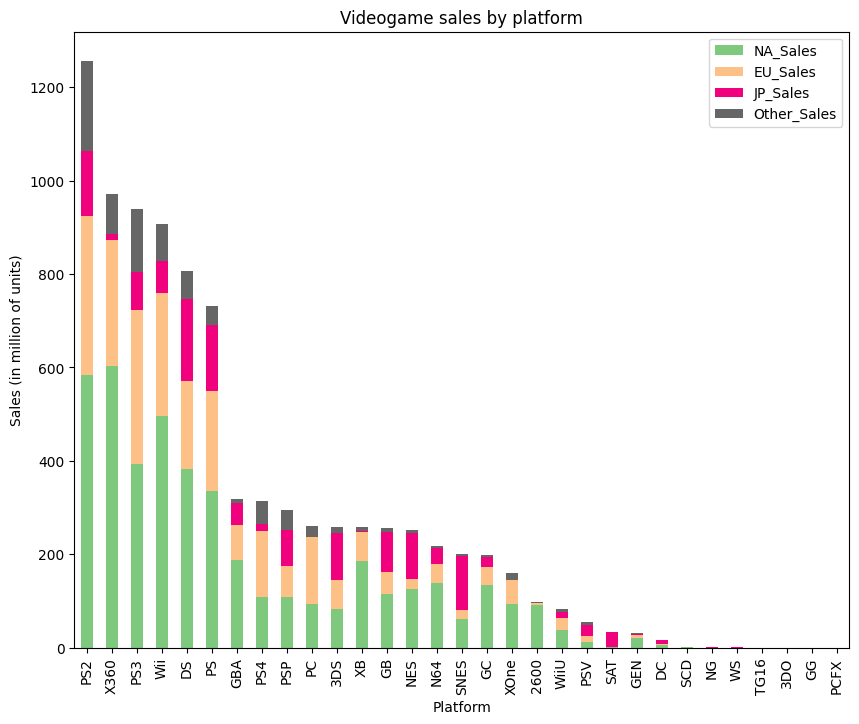

In [13]:
#Se quita la columna Global_Sales ya que es la suma de las otras ventas

platform_sales_plot = platform_sales_grouped.copy()

platform_sales_plot = platform_sales_plot.drop("Global_Sales", axis=1)


#Se crea un grafico de barras con pandas
platform_sales_plot.plot.bar(x='Platform', stacked=True, figsize=(10,8), title="Videogame sales by platform", xlabel="Platform", ylabel="Sales (in million of units)", colormap="Accent")

### Ventas de videjuegos por año de los 10 publisher con mas ventas

In [14]:
videogame_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


##### Obtener los 10 publisher con mas ventas en total

In [15]:
#El nombre de Publisher con el total de sus ventas
top_10_publisher_df = videogame_df[["Publisher", "Global_Sales"]].groupby(["Publisher"],as_index=False).sum()

top_10_publisher_df

,Publisher,Global_Sales
0,10TACLE Studios,0.11
1,1C Company,0.10
2,20th Century Fox Video Games,1.94
3,2D Boy,0.04
4,3DO,10.12
...,...,...
576,id Software,0.03
577,imageepoch Inc.,0.04
578,inXile Entertainment,0.10
579,"mixi, Inc",0.87


In [16]:
#los 10 publisher con mas ventas

top_10_publisher_df = top_10_publisher_df.sort_values("Global_Sales", ascending=False)


list_publishers = list(top_10_publisher_df["Publisher"][:10])

print(list_publishers)

['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ', 'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games']


##### Filtrar el nombre del publisher el año y el total de venta en un nuevo DataFrame

In [17]:
year_sales = videogame_df[["Year_of_Release", "Publisher", "Global_Sales"]]

year_sales.head()

,Year_of_Release,Publisher,Global_Sales
0,2006.0,Nintendo,82.53
1,1985.0,Nintendo,40.24
2,2008.0,Nintendo,35.52
3,2009.0,Nintendo,32.77
4,1996.0,Nintendo,31.37


##### Eliminar las filas de las que no tengamos info completa

In [18]:
year_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Publisher        16665 non-null  object 
 2   Global_Sales     16719 non-null  float64
dtypes: float64(2), object(1)
memory usage: 392.0+ KB


In [19]:
year_sales = year_sales.dropna()

display(year_sales)

,Year_of_Release,Publisher,Global_Sales
0,2006.0,Nintendo,82.53
1,1985.0,Nintendo,40.24
2,2008.0,Nintendo,35.52
3,2009.0,Nintendo,32.77
4,1996.0,Nintendo,31.37
...,...,...,...
16714,2016.0,Tecmo Koei,0.01
16715,2006.0,Codemasters,0.01
16716,2016.0,Idea Factory,0.01
16717,2003.0,Wanadoo,0.01


##### Los datos del año estan guardados como numero con decimal. Convertilos en enteros

In [20]:
year_sales["Year_of_Release"] = year_sales["Year_of_Release"].astype("int64")

year_sales.head()

,Year_of_Release,Publisher,Global_Sales
0,2006,Nintendo,82.53
1,1985,Nintendo,40.24
2,2008,Nintendo,35.52
3,2009,Nintendo,32.77
4,1996,Nintendo,31.37


##### Filtrar los nombres de los publisher que esten en el top 10

In [21]:
year_sales_top_10 = year_sales[year_sales["Publisher"].isin(list_publishers)].reset_index(drop=True)

display(year_sales_top_10)

,Year_of_Release,Publisher,Global_Sales
0,2006,Nintendo,82.53
1,1985,Nintendo,40.24
2,2008,Nintendo,35.52
3,2009,Nintendo,32.77
4,1996,Nintendo,31.37
...,...,...,...
8155,2016,Namco Bandai Games,0.01
8156,2006,Sony Computer Entertainment,0.01
8157,2014,Konami Digital Entertainment,0.01
8158,2003,Ubisoft,0.01


##### Agrupar por año y nombre del publisher

In [22]:
year_sales_grouped = year_sales_top_10.groupby(["Year_of_Release","Publisher"], as_index=False).agg({'Global_Sales':'sum'})

year_sales_grouped

,Year_of_Release,Publisher,Global_Sales
0,1980,Activision,3.02
1,1981,Activision,8.50
2,1982,Activision,1.86
3,1982,Sega,0.40
4,1983,Activision,1.94
...,...,...,...
261,2016,Sony Computer Entertainment,9.07
262,2016,Take-Two Interactive,8.58
263,2016,Ubisoft,12.63
264,2017,Sega,0.05


##### Crear grafico

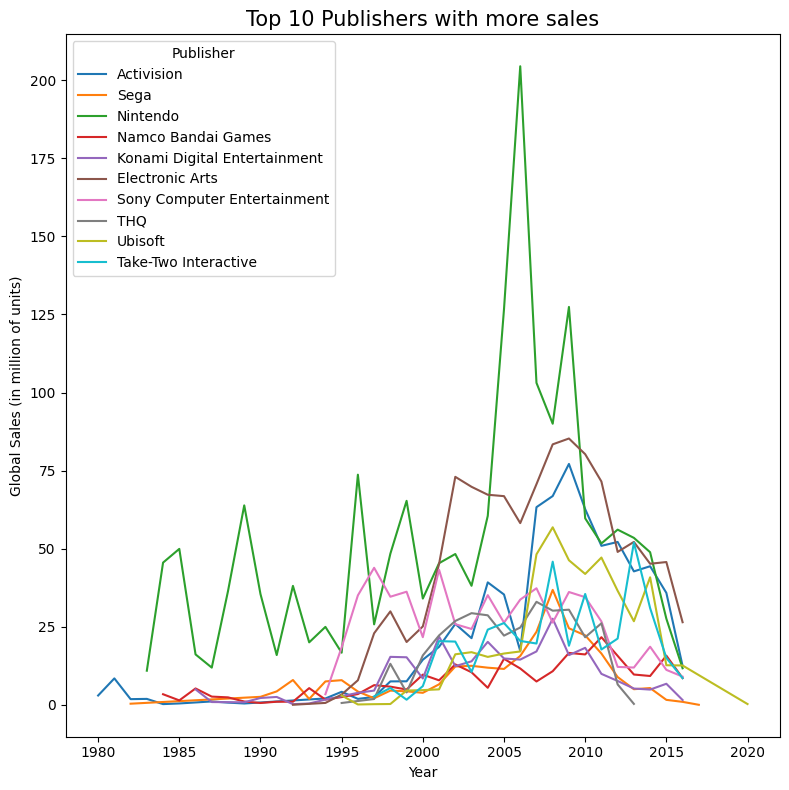

In [23]:
top10_plot = sns.lineplot(data=year_sales_grouped, x="Year_of_Release", y="Global_Sales", hue="Publisher")

top10_plot.figure.set_figwidth(8)
top10_plot.figure.set_figheight(8)
top10_plot.set_title("Top 10 Publishers with more sales", fontsize=15)
top10_plot.set_xlabel("Year", fontsize=10)
top10_plot.set_ylabel("Global Sales (in million of units)", fontsize=10)
plt.tight_layout()

In [24]:
#Nintendo dominando las ventas hasta hace poco

### Popularidad de generos de videojuegos a traves el tiempo

##### Filtrar el nombre del publisher el año y el total de venta en un nuevo DataFrame

In [25]:
genre_sales = videogame_df[["Year_of_Release", "Genre", "Global_Sales"]]

genre_sales

,Year_of_Release,Genre,Global_Sales
0,2006.0,Sports,82.53
1,1985.0,Platform,40.24
2,2008.0,Racing,35.52
3,2009.0,Sports,32.77
4,1996.0,Role-Playing,31.37
...,...,...,...
16714,2016.0,Action,0.01
16715,2006.0,Sports,0.01
16716,2016.0,Adventure,0.01
16717,2003.0,Platform,0.01


In [26]:
genre_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Genre            16717 non-null  object 
 2   Global_Sales     16719 non-null  float64
dtypes: float64(2), object(1)
memory usage: 392.0+ KB


##### Eliminar las filas de las que no tengamos info completa

In [27]:
genre_sales = genre_sales.dropna()

genre_sales

,Year_of_Release,Genre,Global_Sales
0,2006.0,Sports,82.53
1,1985.0,Platform,40.24
2,2008.0,Racing,35.52
3,2009.0,Sports,32.77
4,1996.0,Role-Playing,31.37
...,...,...,...
16714,2016.0,Action,0.01
16715,2006.0,Sports,0.01
16716,2016.0,Adventure,0.01
16717,2003.0,Platform,0.01


##### Agrupar por año y genero del videojuego, sumando sus ventas totales.

In [28]:
genre_sales_grouped = genre_sales.groupby(["Year_of_Release","Genre"], as_index=False).agg({'Global_Sales':'sum'})

genre_sales_grouped

,Year_of_Release,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49
...,...,...,...
385,2016.0,Sports,23.53
386,2016.0,Strategy,1.15
387,2017.0,Action,0.01
388,2017.0,Role-Playing,0.05


##### Crear grafico con seaborn

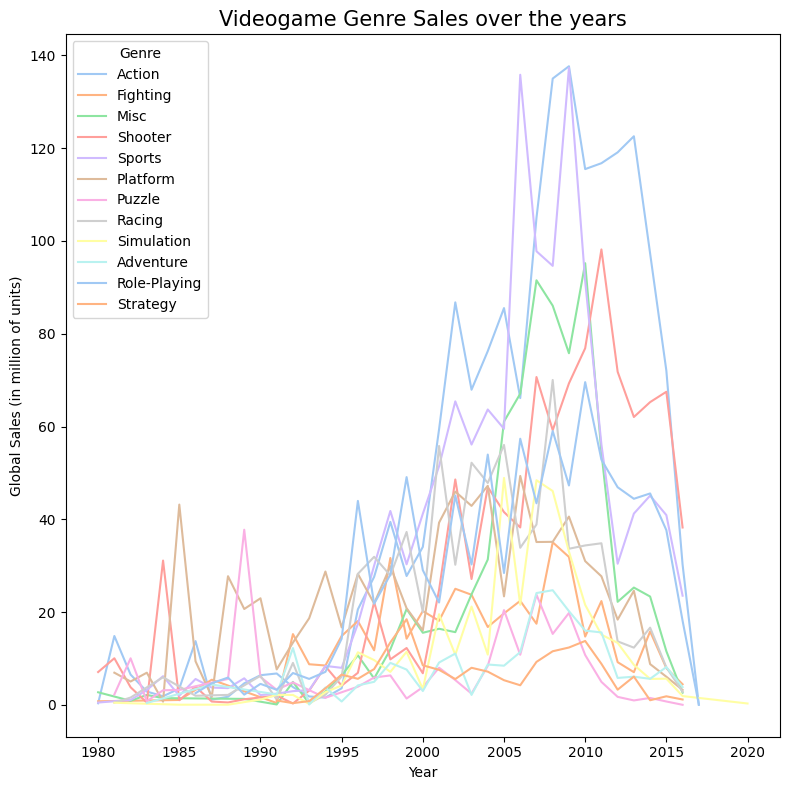

In [29]:
genre_plot = sns.lineplot(data=genre_sales_grouped, x="Year_of_Release", y="Global_Sales", hue="Genre", palette="pastel")

genre_plot.figure.set_figwidth(8)
genre_plot.figure.set_figheight(8)
genre_plot.set_title("Videogame Genre Sales over the years", fontsize=15)
genre_plot.set_xlabel("Year", fontsize=10)
genre_plot.set_ylabel("Global Sales (in million of units)", fontsize=10)
plt.tight_layout()

## Modelo Machine Learning

#### Hacer un modelo que, dado los datos de clasificacion y ventas, clasifique el genero al que pertenece

In [30]:
videogame_data = videogame_df.copy()
                                     
videogame_data.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
10819,Medieval II: Total War,PC,2006.0,Strategy,Sega,0.00,0.08,0.00,0.02,0.10,88.0,39.0,8.9,648.0,Creative Assembly,T
15270,Grey's Anatomy: The Video Game,PC,2009.0,Adventure,Ubisoft,0.00,0.02,0.00,0.00,0.02,36.0,4.0,3.9,20.0,Longtail Studios,T
16629,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006.0,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
5660,Madden NFL 2002,GBA,2001.0,Sports,Electronic Arts,0.23,0.08,0.00,0.01,0.32,NaN,NaN,tbd,NaN,BudCat,E
4704,Command & Conquer: Red Alert,PS,1997.0,Strategy,Virgin Interactive,0.23,0.16,0.00,0.03,0.41,NaN,NaN,NaN,NaN,NaN,NaN


##### Eliminar las columnas que no usare para el modelo

In [31]:
videogame_data = videogame_data.drop(["Name","Platform", "Publisher", "Developer"], axis=1)

videogame_data

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [32]:
videogame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Genre            16717 non-null  object 
 2   NA_Sales         16719 non-null  float64
 3   EU_Sales         16719 non-null  float64
 4   JP_Sales         16719 non-null  float64
 5   Other_Sales      16719 non-null  float64
 6   Global_Sales     16719 non-null  float64
 7   Critic_Score     8137 non-null   float64
 8   Critic_Count     8137 non-null   float64
 9   User_Score       10015 non-null  object 
 10  User_Count       7590 non-null   float64
 11  Rating           9950 non-null   object 
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


##### Hay datos faltantes en todas las columnas menos en la de ventas. Eliminarlos reduciria considerablemente el damaño del dataset. Asi que ire columna por columna a ver como los puedo llenar

### **Year_of_Release**

In [33]:
videogame_data[videogame_data["Year_of_Release"].isnull()]

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
183,NaN,Sports,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,E
377,NaN,Sports,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,E
456,NaN,Action,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,E10+
475,NaN,Fighting,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN
609,NaN,Shooter,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16376,NaN,Sports,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,E10+
16409,NaN,Racing,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,T
16452,NaN,Shooter,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,M
16462,NaN,Adventure,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


##### Al ser alrededor del 2% del total de las muestras decidi descartarlos

In [34]:
videogame_data.dropna(subset=['Year_of_Release'], how='all', inplace=True)

videogame_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Genre            16448 non-null  object 
 2   NA_Sales         16450 non-null  float64
 3   EU_Sales         16450 non-null  float64
 4   JP_Sales         16450 non-null  float64
 5   Other_Sales      16450 non-null  float64
 6   Global_Sales     16450 non-null  float64
 7   Critic_Score     7983 non-null   float64
 8   Critic_Count     7983 non-null   float64
 9   User_Score       9840 non-null   object 
 10  User_Count       7463 non-null   float64
 11  Rating           9769 non-null   object 
dtypes: float64(9), object(3)
memory usage: 1.6+ MB


### **Rating**

In [35]:
videogame_data[videogame_data["Rating"].isnull()]

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
1,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
4,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,1989.0,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
9,1984.0,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN
10,2005.0,Simulation,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [36]:
videogame_data["Rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

##### Existe ya una categoria para los juegos sin rating que es RP (Rate Pending), decidi pasar todos los NaN a esta clase.

In [37]:
videogame_data["Rating"] = videogame_data["Rating"].fillna("RP")

In [38]:
videogame_data["Rating"].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [39]:
videogame_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Genre            16448 non-null  object 
 2   NA_Sales         16450 non-null  float64
 3   EU_Sales         16450 non-null  float64
 4   JP_Sales         16450 non-null  float64
 5   Other_Sales      16450 non-null  float64
 6   Global_Sales     16450 non-null  float64
 7   Critic_Score     7983 non-null   float64
 8   Critic_Count     7983 non-null   float64
 9   User_Score       9840 non-null   object 
 10  User_Count       7463 non-null   float64
 11  Rating           16450 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.6+ MB


### **Critic_Score, Critic_Count, User_Score y User_Count**

In [40]:
videogame_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Genre            16448 non-null  object 
 2   NA_Sales         16450 non-null  float64
 3   EU_Sales         16450 non-null  float64
 4   JP_Sales         16450 non-null  float64
 5   Other_Sales      16450 non-null  float64
 6   Global_Sales     16450 non-null  float64
 7   Critic_Score     7983 non-null   float64
 8   Critic_Count     7983 non-null   float64
 9   User_Score       9840 non-null   object 
 10  User_Count       7463 non-null   float64
 11  Rating           16450 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.6+ MB


##### Se tienen varios problemas con estas columnas, ademas de que tienen muchos datos faltantes, la columna User_score no esta guardada como un numero.

In [41]:
videogame_data["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [42]:
#Convertir toda la columna a numero
videogame_data["User_Score"] = videogame_data["User_Score"].apply(pd.to_numeric, errors='coerce')

videogame_data["User_Score"].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [43]:
videogame_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Genre            16448 non-null  object 
 2   NA_Sales         16450 non-null  float64
 3   EU_Sales         16450 non-null  float64
 4   JP_Sales         16450 non-null  float64
 5   Other_Sales      16450 non-null  float64
 6   Global_Sales     16450 non-null  float64
 7   Critic_Score     7983 non-null   float64
 8   Critic_Count     7983 non-null   float64
 9   User_Score       7463 non-null   float64
 10  User_Count       7463 non-null   float64
 11  Rating           16450 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.6+ MB


##### Debido a la cantidad de valores faltantes, decidi usar un imputer del sklearn para que derivara los valores faltantes de los valores que tenemos. Para ello usa el metodo de nearest neightbor para llenar los datos faltantes.

Pero antes de esto debemos llevar los parametros de clasificacion que estan en str a numeros con el LabelEncoder

In [44]:
from sklearn import preprocessing

In [45]:
videogame_df = videogame_data.copy()

In [46]:
def encode_features(df, features):
    '''
    '''
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        print(f"Feature {feature} OK")

In [47]:
features = ['Genre', 'Rating']
encode_features(videogame_df, features)
videogame_df.sample(5)

Feature Genre OK
Feature Rating OK


,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
1169,2008.0,9,0.94,0.48,0.01,0.15,1.58,69.0,8.0,6.8,6.0,2
14146,2009.0,3,0.03,0.00,0.00,0.00,0.03,NaN,NaN,NaN,NaN,6
767,2016.0,8,0.81,0.85,0.15,0.33,2.14,90.0,31.0,6.1,1358.0,7
12599,2008.0,2,0.00,0.00,0.06,0.00,0.06,NaN,NaN,NaN,NaN,6
6186,2008.0,0,0.06,0.00,0.20,0.01,0.28,70.0,21.0,7.5,6.0,7


In [48]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")

videogame_df = pd.DataFrame(imputer.fit_transform(videogame_df), columns=videogame_df.columns)

In [49]:
videogame_df.sample(5)

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
8784,2014.0,0.0,0.00,0.00,0.15,0.00,0.15,72.8,24.4,8.14,84.8,6.0
1680,1999.0,6.0,0.99,0.16,0.00,0.04,1.19,80.0,15.8,8.30,78.4,6.0
10895,2015.0,10.0,0.03,0.05,0.00,0.01,0.09,38.2,7.4,4.32,62.4,1.0
11629,2005.0,10.0,0.07,0.00,0.00,0.01,0.07,51.0,11.0,5.30,4.0,7.0
6927,2009.0,0.0,0.00,0.00,0.23,0.00,0.23,61.4,25.0,7.12,17.4,6.0


In [50]:
videogame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16450 entries, 0 to 16449
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   Genre            16450 non-null  float64
 2   NA_Sales         16450 non-null  float64
 3   EU_Sales         16450 non-null  float64
 4   JP_Sales         16450 non-null  float64
 5   Other_Sales      16450 non-null  float64
 6   Global_Sales     16450 non-null  float64
 7   Critic_Score     16450 non-null  float64
 8   Critic_Count     16450 non-null  float64
 9   User_Score       16450 non-null  float64
 10  User_Count       16450 non-null  float64
 11  Rating           16450 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


#### Escalar valores de las columnas

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [52]:
ct = ColumnTransformer([('scaler', StandardScaler(), [0,1,2,3,4,5,6,7,8,9,10,11])])
df_scaled = pd.DataFrame(ct.fit_transform(videogame_df),columns=videogame_df.columns)
display(videogame_df.head(5))
display(df_scaled)

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,2006.0,10.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,1.0
1,1985.0,4.0,29.08,3.58,6.81,0.77,40.24,79.2,66.4,7.96,411.0,6.0
2,2008.0,6.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,1.0
3,2009.0,10.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,1.0
4,1996.0,7.0,11.27,8.89,10.22,1.00,31.37,81.4,64.6,8.08,465.4,6.0


,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,-0.082900,1.351710,50.221175,56.874729,11.868496,44.701525,52.614411,0.620516,1.851566,0.695529,0.369594,-1.515089
1,-3.655048,-0.242261,35.214444,6.778384,21.642266,3.843319,25.477422,0.891130,2.849543,0.663992,0.567480,0.618711
2,0.257304,0.289063,18.839020,24.898339,11.932797,17.249918,22.448654,1.127918,3.277247,0.932057,1.230067,-1.515089
3,0.427407,1.351710,18.753477,21.286191,10.293118,15.441091,20.684012,0.958784,3.277247,0.695529,0.080546,-1.515089
4,-1.783923,0.554725,13.449795,17.259534,32.605607,5.066937,19.785649,1.077178,2.732896,0.758603,0.688436,0.618711
...,...,...,...,...,...,...,...,...,...,...,...,...
16445,1.618122,-1.304908,-0.322670,-0.288003,-0.220115,-0.253142,-0.337689,-0.123675,-0.092546,-0.408269,-0.255195,0.618711
16446,-0.082900,1.351710,-0.322670,-0.268265,-0.252266,-0.253142,-0.337689,-1.155393,-0.909073,-1.102085,-0.325456,0.618711
16447,1.618122,-1.039247,-0.322670,-0.288003,-0.220115,-0.253142,-0.337689,-0.225155,-0.623936,0.395927,-0.237407,0.618711
16448,-0.593207,-0.242261,-0.310450,-0.288003,-0.252266,-0.253142,-0.337689,-0.647990,-0.170310,0.190936,-0.324122,0.618711


## **Modelo**

### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
y = videogame_df['Genre']
X = videogame_df.drop(['Genre'], axis=1)

validation_split = 0.15
seed = 811
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_split, random_state=seed)

In [55]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (13982, 11)
Shape of X_test=> (2468, 11)
Shape of Y_train=> (13982,)
Shape of Y_test=> (2468,)


### Probando RandomForestClassifier con los parametros en default

In [56]:
from sklearn.ensemble import RandomForestClassifier

vg_model = RandomForestClassifier()
vg_model.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
from sklearn.metrics import accuracy_score

y_pred = vg_model.predict(X_test)

print(y_pred.shape, y_test.shape)

(2468,) (2468,)


In [58]:
accuracy_score(y_pred, y_test)

0.606969205834684

In [59]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[382   5   7  13   8   1  11  14  39   0  28   5   0]
 [ 35 100   0   4   3   0   4   5   6   0   8   4   0]
 [ 29   1  60   6   4   0   1  12   4   1   0   0   0]
 [ 27   1   5 166   6   2   6   3   3   1  17   0   0]
 [ 22   1   3   4  52   6  11   7   1   1  24   0   0]
 [  3   0   1   4   3  51   3   2   3   1  19   0   0]
 [ 44   3   2   5   6   7  94   5   7   3  34   2   0]
 [ 38   3   7   5   3   0   9 140  16   1   9   2   0]
 [ 83   1   5   3   2   1   5  15  79   2   4   2   0]
 [ 12   3   4  10   4   0   5   2   8  64  20   5   0]
 [ 23   1   2   8   8   3  14   1   3   3 265   2   0]
 [ 16   1   3   3   1   1   3   3   6   2   7  45   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.54      0.74      0.62       513
         1.0       0.83      0.59      0.69       169
         2.0       0.61      0.51      0.55       118
         3.0       0.72      0.70      0.71       237
         4.0       0.52      0.39      0.45       132
         5.0       0.71      0.57      0.63        90
         6.0       0.57      0.44      0.50       212
         7.0       0.67      0.60      0.63       233
         8.0       0.45      0.39      0.42       202
         9.0       0.81      0.47      0.59       137
        10.0       0.61      0.80      0.69       333
        11.0       0.67      0.49      0.57        91
        12.0       0.00      0.00      0.00         1

    accuracy                           0.61      2468
   macro avg       0.59      0.52      0.54      2468
weighted avg       0.62      0.61      0.60      2468



C:\Users\Jose M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jose M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jose M\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### Utilizando RandomSearch para intentar mejorar los resultados

##### Creamos un diccionario con los diferentes parametros que se pueden modificar

In [62]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 200, 300, 400]
max_features = ["sqrt", "log2", None]
max_depth = [2,4,6,8,10,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [64]:
rand = RandomizedSearchCV(vg_model, random_grid, cv=2, scoring='accuracy', n_iter=10, random_state=seed, n_jobs=-1)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.152280,0.047356,"{'n_estimators': 300, 'min_samples_split': 10,..."
1,0.178116,0.075380,"{'n_estimators': 400, 'min_samples_split': 5, ..."
2,0.138116,0.040243,"{'n_estimators': 300, 'min_samples_split': 5, ..."
3,0.156170,0.059757,"{'n_estimators': 200, 'min_samples_split': 2, ..."
4,0.179939,0.087660,"{'n_estimators': 300, 'min_samples_split': 10,..."
5,0.144498,0.044681,"{'n_estimators': 200, 'min_samples_split': 5, ..."
6,0.176596,0.084195,"{'n_estimators': 400, 'min_samples_split': 2, ..."
7,0.145106,0.041641,"{'n_estimators': 100, 'min_samples_split': 5, ..."
8,0.145410,0.055198,"{'n_estimators': 200, 'min_samples_split': 10,..."
9,0.126322,0.034286,"{'n_estimators': 300, 'min_samples_split': 5, ..."


In [65]:
print(rand.best_score_)
print(rand.best_params_)

0.17993920972644378
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4}


In [66]:
#Probando el modelo con los parametros arrojados

vg_model = RandomForestClassifier(n_estimators=100, 
                                  min_samples_split=2, 
                                  min_samples_leaf=2, 
                                  max_features='sqrt', 
                                  max_depth=2, 
                                  bootstrap=False)
vg_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=2, min_samples_leaf=2)

In [67]:
from sklearn.metrics import accuracy_score

y_pred = vg_model.predict(X_test)

print(y_pred.shape, y_test.shape)

(2468,) (2468,)


In [68]:
accuracy_score(y_pred, y_test)

0.2694489465153971

In [69]:
#Porque da menos?

### Testeando eliminando los critic y user score

In [70]:
X = X.drop(["Critic_Score", "Critic_Count", "User_Score", "User_Count"], axis=1)

In [71]:
validation_split = 0.15
seed = 811
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_split, random_state=seed)

In [72]:
vg_model_no_score = RandomForestClassifier()
vg_model_no_score.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
from sklearn.metrics import accuracy_score

y_pred = vg_model_no_score.predict(X_test)

print(y_pred.shape, y_test.shape)

(2468,) (2468,)


In [74]:
accuracy_score(y_pred, y_test)

0.2645867098865478

In [75]:
rand = RandomizedSearchCV(vg_model_no_score, random_grid, cv=2, scoring='accuracy', n_iter=10, random_state=seed, n_jobs=-1)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.091246,0.009544,"{'n_estimators': 300, 'min_samples_split': 10,..."
1,0.177508,0.075502,"{'n_estimators': 400, 'min_samples_split': 5, ..."
2,0.091915,0.010091,"{'n_estimators': 300, 'min_samples_split': 5, ..."
3,0.094407,0.013313,"{'n_estimators': 200, 'min_samples_split': 2, ..."
4,0.114590,0.031307,"{'n_estimators': 300, 'min_samples_split': 10,..."
5,0.091611,0.010030,"{'n_estimators': 200, 'min_samples_split': 5, ..."
6,0.111185,0.027903,"{'n_estimators': 400, 'min_samples_split': 2, ..."
7,0.091489,0.010030,"{'n_estimators': 100, 'min_samples_split': 5, ..."
8,0.085289,0.005046,"{'n_estimators': 200, 'min_samples_split': 10,..."
9,0.095684,0.013009,"{'n_estimators': 300, 'min_samples_split': 5, ..."
